In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

c:\Users\hp\Desktop\briefs\rag-it-support-assistant\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# questions.py

questions = [
    "What are the three fundamental questions all IT support stems from?",
    "Why is 'How did the problem begin?' considered the most important question?",
    "What is the most basic principle of IT support mentioned in Chapter 1?",
    "Why should an IT professional always ask 'What's changed?'",
    "What is the definition of a 'numpty' in the context of IT support?",
    "Why is a computer left in its box considered 'problem-free'?",
    "How can a tiny change in a model number (like an added 'S') affect IT support?",
    "What is the 'Language Barrier' in IT support?",
    "Why is the 'Human Factor' considered complex in IT troubleshooting?",
    "What are the six steps for approaching communications with a user?",
    "Why should you assume a user has no technical knowledge initially?",
    "Why is it beneficial to ask 'Yes/No' questions during a diagnosis?",
    "What is the purpose of asking a user to repeat instructions back to you?",
    "Name three types of devices besides PCs that an IT professional might encounter.",
    "When does official support for Windows 7 end?",
    "When does official support for Windows 8.1 end?",
    "How often are 'feature packs' for Windows 10 typically released?",
    "What is the 'Long Term Servicing Channel' (LTSC) in Windows 10?",
    "How long does Apple typically support OS X and iOS versions?",
    "Why is 'interconnectedness' a challenge for modern IT systems?",
    "What is 'Flow Logic' in the context of troubleshooting?",
    "Why is the 'Process of Elimination' critical in IT support?",
    "What does it mean to 'Begin at the End' when diagnosing a problem?",
    "How can asset tag and installation date data reduce support workload?",
    "Why is it important to never make assumptions during teaching or support?",
    "How can an IT professional gauge a user's level of technical expertise?",
    "What is the 'Non-technical Dictionary'?",
    "If a user points to a monitor when asked for their computer, what should you do?",
    "How does online chat differ from phone support in terms of user querying?",
    "What is the 'Root Cause' of an IT issue?",
    "Why is troubleshooting described as a 'holistic process'?",
    "What are 'dots' in the context of 'joining the dots'?",
    "Why is it important to take a break from a complex problem?",
    "How can small steps and small checks eliminate possible causes?",
    "What is the role of diplomacy in IT support?",
    "Why do users sometimes find satisfaction in learning what they did wrong?",
    "What is the 'endorphin hit' associated with solving an IT puzzle?",
    "How does the 'murder mystery' analogy apply to IT diagnostics?",
    "Why should paperwork allow anyone to 'run with' a job in progress?",
    "What is the primary goal of creating quality paperwork?",
    "How are modern IT systems structured differently from legacy systems?",
    "Why is hardware sometimes the 'last cause' of a problem?",
    "What can cause a PC to turn on briefly and then shut off?",
    "How does an aging power supply affect a computer?",
    "Name three external factors that can cause hardware failure.",
    "What is a UPS and why is it used?",
    "How do environmental factors like dust or moisture affect IT systems?",
    "What are common reasons why users 'screw up' IT systems?",
    "How can software settings lead to IT support calls?",
    "What is the 'Monkey Mind' in the context of the human factor?",
    "What challenges do legacy devices present to modern operating systems?",
    "What is a device driver?",
    "How do you troubleshoot device driver errors?",
    "What are the common issues associated with USB peripherals?",
    "How do buildings and city/countryside locations affect Wi-Fi and cellular signals?",
    "What is 'IT and Accessibility'?",
    "How do Windows updates sometimes interfere with hardware compatibility?",
    "Why is it difficult to support software users installed themselves?",
    "What 'headaches' can developers (devs) cause for IT support?",
    "What is the 'upshot' of living in the internet age for IT support?",
    "Why does good documentation save a business time and money?",
    "How does documentation assist in staff training?",
    "What does 'dumbing things down' mean in documentation?",
    "What is the 'KISS' principle in IT support?",
    "Why should troubleshooting guides be 'clean and concise'?",
    "What are the three levels of support paperwork mentioned?",
    "What is 'First-Line Support Paperwork'?",
    "What is the difference between second- and third-line support paperwork?",
    "Why is a 'Why?' box for every question in paperwork counter-productive?",
    "What is the value of 'Extra information' sections in forms?",
    "What are the three reasons for knowing the resolution of a case?",
    "How does documentation help with client billing?",
    "What is a 'repository' of IT data?",
    "How can case reviews improve future workflows?",
    "What is the 'Reliability History' tool in Windows?",
    "What information can be found in 'System Information' on a PC?",
    "What is the 'Performance Monitor' used for?",
    "How do you use the 'Event Viewer' to diagnose errors?",
    "What are the different tabs in the 'Task Manager'?",
    "How can you connect to the event log on another PC?",
    "What is 'Remote Desktop'?",
    "How does 'Quick Assist' help in providing remote support?",
    "Name two third-party remote support tools.",
    "What is an 'Asset Tag' and why is it used in remote gathering?",
    "How do you permit remote administration on a Windows PC?",
    "What is the risk of signing into the registry as another user?",
    "What is the Microsoft Management Console (MMC)?",
    "How can you use MMC remotely?",
    "What is the 'Problem Steps Recorder'?",
    "How do screenshots help in troubleshooting?",
    "What is 'Screencasting'?",
    "How can the Xbox Game Bar be used for IT support?",
    "What are '.dmp' files?",
    "Where can you find other Windows error logs besides the Event Viewer?",
    "What are ETL log files?",
    "How do you copy and save event details for later analysis?",
    "What is 'Reliability History' used for in advanced diagnostics?",
    "Why is 'Écouter et Répéter' mentioned in training?",
    "What are the 'administrative tools' in Windows?",
    "How does a step-by-step approach benefit troubleshooting device drivers?",
]

In [14]:
from langchain_community.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.decomposition import PCA
import os
from dotenv import load_dotenv

load_dotenv()

# Initialisation du modèle d'embeddings
print("Chargement du modèle d'embeddings...")
embedding_model = HuggingFaceEmbeddings(
    model_name="BAAI/bge-small-en-v1.5", model_kwargs={"token": os.getenv('HUGGINGFACE_API_KEY')}
)

# Génération des embeddings pour toutes les questions
print("Génération des embeddings (cela peut prendre 30-60 secondes)...")
embeddings = []

# Méthode 1: Batch processing (plus rapide) - RECOMMANDÉ
embeddings = embedding_model.embed_documents(questions)
embeddings_X = np.array(embeddings)

pca = PCA(n_components=0.95)
embeddings_reduced = pca.fit_transform(embeddings_X)


######################

# question_vectors = embedding_function.embed_documents(questions)
# X = np.array(question_vectors)


# pca = PCA(n_components=0.95)
# X_reduced = pca.fit_transform(X)

# inertia_values = []
# k_range = range(1, 15)

# for k in k_range:
#     km = KMeans(n_clusters=k, random_state=42, n_init="auto")
#     km.fit(X_reduced)
#     inertia_values.append(km.inertia_)

# plt.figure(figsize=(8, 5))
# plt.plot(k_range, inertia_values, marker="o", color="b")
# plt.title("Elbow Method for Optimal K")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia (WCSS)")
# plt.grid(True)
# plt.show()


Chargement du modèle d'embeddings...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 81bc8fc5-87a8-419b-a883-56edab91f584)')' thrown while requesting HEAD https://huggingface.co/BAAI/bge-small-en-v1.5/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].


Génération des embeddings (cela peut prendre 30-60 secondes)...


In [19]:
inertia_values = []
k_range = range(1, 15)

for k in k_range:
    kmeans_model = KMeans( n_clusters=k, random_state=42,n_init='auto')
    kmeans_model.fit(embeddings_reduced)
    inertia_values.append(kmeans_model.inertia_)
    

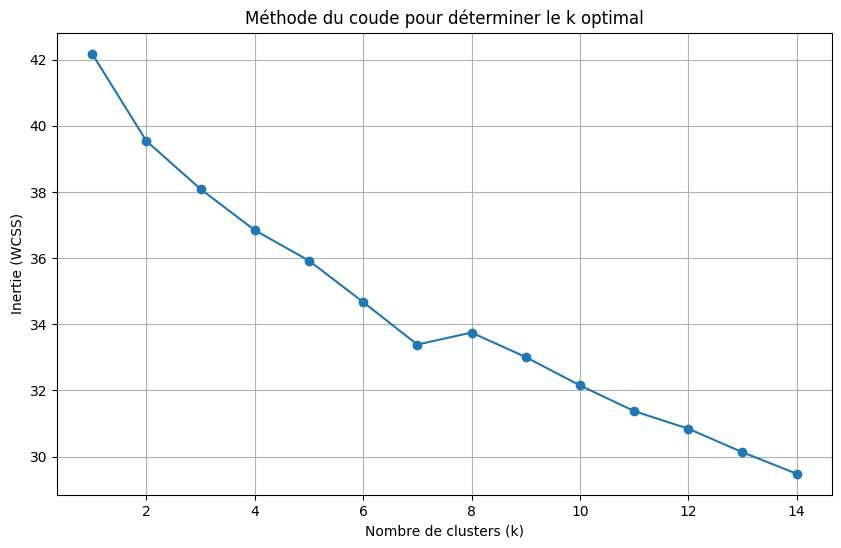

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (WCSS)")
plt.title("Méthode du coude pour déterminer le k optimal")
plt.grid(True)
plt.show()

### ENTRAÎNEMENT DU MODÈLE K-MEANS

In [24]:
num_clusters =7
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(embeddings_reduced)

print(f"✓ Modèle K-Means entraîné avec {num_clusters} clusters")
print(f"  Inertie: {kmeans.inertia_:.2f}")

✓ Modèle K-Means entraîné avec 7 clusters
  Inertie: 33.39


### ASSIGNATION DES LABELS AUX QUESTIONS

In [25]:
labels = kmeans.labels_
df_results = pd.DataFrame({'question': questions, 'cluster': labels})

print("Résultats du regroupement :")
print(df_results.sort_values(by='cluster'))

print("\n" + "="*80)
print("DISTRIBUTION DES CLUSTERS :")
print("="*80)
cluster_counts = df_results['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} questions ({count/len(df_results)*100:.1f}%)")

Résultats du regroupement :
                                             question  cluster
25  How can an IT professional gauge a user's leve...        0
22  What does it mean to 'Begin at the End' when d...        0
36  What is the 'endorphin hit' associated with so...        0
37  How does the 'murder mystery' analogy apply to...        0
49  What is the 'Monkey Mind' in the context of th...        0
..                                                ...      ...
13  Name three types of devices besides PCs that a...        6
53  What are the common issues associated with USB...        6
51                           What is a device driver?        6
89        How do screenshots help in troubleshooting?        6
99  How does a step-by-step approach benefit troub...        6

[100 rows x 2 columns]

DISTRIBUTION DES CLUSTERS :
Cluster 0: 7 questions (7.0%)
Cluster 1: 13 questions (13.0%)
Cluster 2: 9 questions (9.0%)
Cluster 3: 23 questions (23.0%)
Cluster 4: 11 questions (11.0%)
Cluster

### Evaluation du Modèle

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

metrics = {
        'silhouette_score': silhouette_score(embeddings_reduced, labels),
        'davies_bouldin_score': davies_bouldin_score(embeddings_reduced, labels),
        'calinski_harabasz_score': calinski_harabasz_score(embeddings_reduced, labels)
    }
    

print(f"Silhouette Score:        {metrics['silhouette_score']:.4f}")
print(f"  → Plus proche de 1 = meilleur (clusters bien séparés)")
print(f"\nDavies-Bouldin Score:    {metrics['davies_bouldin_score']:.4f}")
print(f"  → Plus proche de 0 = meilleur (clusters compacts)")
print(f"\nCalinski-Harabasz Score: {metrics['calinski_harabasz_score']:.2f}")
print(f"  → Plus élevé = meilleur (clusters denses et bien séparés)")

Silhouette Score:        0.0502
  → Plus proche de 1 = meilleur (clusters bien séparés)

Davies-Bouldin Score:    2.8842
  → Plus proche de 0 = meilleur (clusters compacts)

Calinski-Harabasz Score: 4.08
  → Plus élevé = meilleur (clusters denses et bien séparés)


In [9]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)
    
print("\nRecherche du nombre optimal de clusters...")
print("="*80)
    
for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(embeddings)
        
        inertia = kmeans.inertia_
        silhouette = silhouette_score(embeddings, labels)
        
        inertias.append(inertia)
        silhouette_scores.append(silhouette)
        
        print(f"k={k:2d} | Inertie: {inertia:8.2f} | Silhouette: {silhouette:.4f}")
    


Recherche du nombre optimal de clusters...


k= 2 | Inertie:    41.43 | Silhouette: 0.0563
k= 3 | Inertie:    39.68 | Silhouette: 0.0473
k= 4 | Inertie:    38.59 | Silhouette: 0.0412
k= 5 | Inertie:    37.25 | Silhouette: 0.0467
k= 6 | Inertie:    35.94 | Silhouette: 0.0492
k= 7 | Inertie:    35.36 | Silhouette: 0.0422
k= 8 | Inertie:    34.49 | Silhouette: 0.0483
k= 9 | Inertie:    34.03 | Silhouette: 0.0442
k=10 | Inertie:    33.46 | Silhouette: 0.0342


In [28]:
import joblib

joblib.dump(pca, "models/pca_model.joblib")
joblib.dump(kmeans_model, "models/kmeans_model.joblib")

print("✅ PCA et KMeans sauvegardés")


✅ PCA et KMeans sauvegardés


### LOAD MODELS

In [29]:
pca_path = "models/pca_model.joblib"
kmeans_path = "models/kmeans_model.joblib"

# Chargement
pca = joblib.load(pca_path)
kmeans_model = joblib.load(kmeans_path)
print("✅ PCA et KMeans chargés")

✅ PCA et KMeans chargés


In [30]:
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
print("✅ Modèle d'embeddings chargé")


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: c6e6cced-505e-4532-ae7e-2e15bfde3cdf)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].


✅ Modèle d'embeddings chargé


In [31]:
# Exemple de nouvelles questions
new_questions = [
    "Comment réinitialiser mon mot de passe IT ?",
    "Erreur 404 sur la page d'accueil",
    "Comment installer un nouveau logiciel sur mon PC ?"
]


In [32]:
new_embeddings = embedding_model.embed_documents(new_questions)
new_embeddings = np.array(new_embeddings)
print(f"Shape des embeddings : {new_embeddings.shape}")


Shape des embeddings : (3, 384)


In [33]:
# Réduction de dimension
new_embeddings_reduced = pca.transform(new_embeddings)

# Prédiction du cluster
predicted_clusters = kmeans_model.predict(new_embeddings_reduced)

for question, cluster in zip(new_questions, predicted_clusters):
    print(f"Question: {question}  → Cluster prédit: {cluster}")


Question: Comment réinitialiser mon mot de passe IT ?  → Cluster prédit: 5
Question: Erreur 404 sur la page d'accueil  → Cluster prédit: 5
Question: Comment installer un nouveau logiciel sur mon PC ?  → Cluster prédit: 5
